# End to End ML Guideline - (Theory)
This notebook serves as a reference guide for all your future ML needs. It is briefly summarize all the steps involved in the flow of a machine learning projects. So use it whenever you start a ML project.

## We will be using Scikit - Learn
Scikit-Learn, also referred to as `sklearn`, is an open-source **Python machine learning library**.

Although there are many (even more advanced) tools are available to perform ML tasks, but Scikit - Learn almost has everything for a beginner's perspective. Right now at this stage, it is important to have the fundamentals concepts cleared. 

## Classification of ML Problems

Mostly, we can classify a ML problem into one of the following. 

- Regression.
- Classification.
- Clustering.
- Time-series forecasting.
- Anomaly detection.
- Ranking.
- Recommendation.
- Data generation.

But generally they all can fall in **regression, classification or clustering** category. So we will be focussing on it. 

 - If you're trying to create a machine learning model to predict whether an email is spam and or not spam, you're working on a classification problem (whether something is one thing or another).

 - If you're trying to create a machine learning model to predict the price of houses given their characteristics, you're working on a regression problem (predicting a number).

 - If you're trying to get a machine learning algorithm to group together similar samples (that you don't necessarily know which should go together), you're working on a clustering problem.

## Workflow of a Machine Learning Project

Typically following steps are involved

1. **Data Collection and Understanding**
     - Loading Data
     - EDA (Exploratory Data Analysis)

2. **Data Preprocessing**
     - Handling Missing Values
     - Feature Scaling
     - Encoding Categorical Data
        - Label Encoding
        - OneHot Encoding

3. **Splitting Data**
     - Training Set
     - Testing Set
     - (If needed) Validation Set

4. **Model Selection & Training**
     - Choosing the Model
     - Hyperparameter Tuning

5. **Model Evaluation**
     - Performance Matrices
     - Cross Validation

6. **Deployment**
     - Model Saving
     - Model Loading

# Churn Modeling 

In this End - to - End ML project, we will try to predict if a customer will churn (backing off from a service) or not based on certain parameter. 
For this we will be using a dataset *Churn_Modelling.csv* and by the end of the project, we will try to understand how the process will work. Our end goal is to predict if a customer will churn or not. 

## Set the Stage

In this step, we begin by importing the relevant libraries and our data

In [91]:
# Importing important libraries

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # For splitting data, hyperparameter tuning, and cross-validation
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # For feature scaling and encoding categorical variables
from sklearn.compose import ColumnTransformer  # For applying different transformations to different columns
from sklearn.pipeline import Pipeline  # For creating a streamlined machine learning workflow
from sklearn.ensemble import RandomForestClassifier  # For using a Random Forest model for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance
import pickle  # For saving and loading the trained model

## Get the Data and Process it

In this step, we will import the file and perform EDA

In [93]:
# Load the Data using Pandas

df = pd.read_csv("Churn_Modelling.csv")

# Lets see how it looks

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Engineering
The dataset consists of customer-related attributes used for predicting churn. It includes **CreditScore** (a numerical score assessing creditworthiness), **Geography** (customer's country), **Gender** (Male/Female), **Age**, **Tenure** (years as a customer), **Balance** (account balance), **NumOfProducts** (number of bank products used), **HasCrCard** (credit card ownership: 1=yes, 0=no), **IsActiveMember** (active status in the bank: 1=yes, 0=no), **EstimatedSalary**, and **Exited** (churn indicator: 1=customer left, 0=customer stayed). The irrelevant columns like **RowNumber, CustomerId, and Surname** were removed as they do not impact churn prediction.

So we will drop unnecessary columns as they have no effect on our prediction.

In [95]:
# Drop irrelevant columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

# Let's see how the data looks now

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

Now we will try to further explore the data to make better decisions. 

In [97]:
# Exploratory Data Analysis
print(df.describe())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

In [98]:
# Also check for null values
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


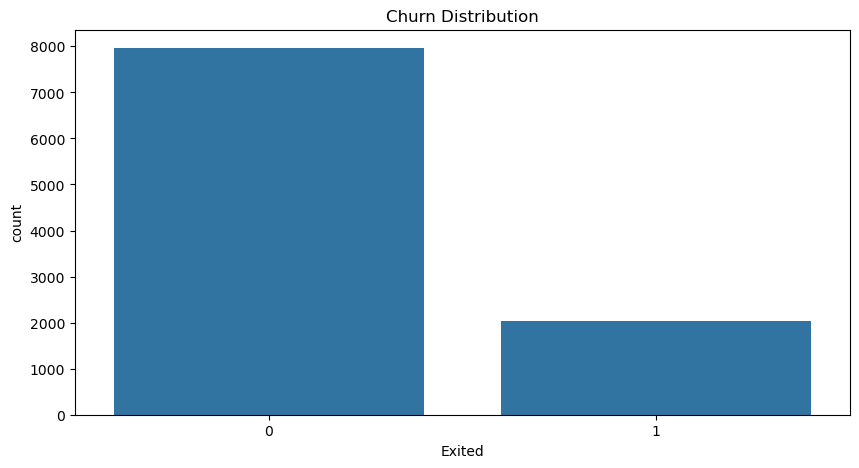

In [99]:
# Visualizing Data
plt.figure(figsize=(10,5))
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()

## Preprocessing the Data
So we don't have any missing data and all the columns are integers except for Gender and Regions. So the next step is to preprocess the data.

We will try **Label Encoding** and **OneHot encoding**. (Notice that we have already imported them)

### Label Encoding
Label Encoding is used to convert categorical variables into numeric values by assigning a unique integer to each category. For example, "Male" and "Female" in a "Gender" column may be encoded as 0 and 1. This method is good for Binary Type Categories. 

**NOTE:** This method is simple and memory-efficient but may introduce an unintended ordinal relationship, which can mislead machine learning models.

### OneHot Encoding
One-Hot Encoding converts categorical variables into multiple binary columns, where each column represents a unique category with 0s and 1s. For instance, a "Geography" column with values "France," "Spain," and "Germany" will be transformed into three columns: Geography_France, Geography_Spain, and Geography_Germany, with a 1 indicating the presence of a particular category.

**NOTE:**  This prevents ordinal misinterpretation but increases dimensionality, especially with high-cardinality features.

In [101]:
# Encoding categorical features - lABEL ENCODER for Gender
le = LabelEncoder() # create instance of Label Encoder
df['Gender'] = le.fit_transform(df['Gender'])

#N Now let's look back at our data
df.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


We can see that Genders have been changed to 0s and 1s. 

But this method cannot be used for the Geography column as it has more than 2 categories. Label encouder is only good for binary encoding. We can use OneHotEncoder for this task. This is good for non-binary encoding. Like we can use 1 for true country and 0 for false country. We will be using this for Geography column. 

In [103]:
ohe_geo = OneHotEncoder() # creating an object of class OneHotEncoder

geo_encoder = ohe_geo.fit_transform(df[['Geography']]).toarray() # this line will encode the labels and convert them into array

# let's see how our encoding looks now

geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [104]:
# We can see the names of the features we got due to these transformations

ohe_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [105]:
# Ok so let's make a dataframe from these transformations

geo_encoded_df = pd.DataFrame(geo_encoder,columns = ohe_geo.get_feature_names_out(['Geography']))

geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [106]:
# Combine one hot encoder columns with the orignal data


df = pd.concat([df.drop('Geography',axis=1),geo_encoded_df],axis=1)

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


Looks good so far. But we can also shift the Exited column to the right (end) just to make gather all features on one side and target on one side. Note: This will not make any difference in ML, but just human things ;-) 

In [121]:
# Reorder the columns so that 'Exited' is at the end (just to make more sence I guess!)
columns = [col for col in df.columns if col != 'Exited']  # All columns except 'Exited'
columns.append('Exited')  # Add 'Exited' to the end
df = df[columns]  # Reorder DataFrame
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,0


Our data looks all set! Its time to divide it into features and target variables. 

## Splitting the Data
After preprocessing, we split the data into training and testing sets. Optionally, you can also create a validation set if required.
But before splitting the data, we have to decide which are our features and which are our target variables. 

 - X -> Features: All except 'Exited'
 - y -> Target: Exited

In [127]:
X = df.drop(columns=['Exited']) # features are X
y = df['Exited'] # target is y

In [133]:
# Create Train & Testing Data Sets from the given data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42 ensures that the split is reproducible;
#setting a specific seed guarantees that the split remains the same every time the code runs.

## Feature Scaling
- **Feature Scaling** is crucial when working with numerical features that have different ranges. Some ML models (like logistic regression, SVMs, and neural networks) perform better when features are standardized.
- `StandardScaler()` scales the features by **removing the mean** and **scaling to unit variance**.  
- `.fit_transform(X_train)`: Computes the mean and standard deviation from the **training data** and scales it.
- `.transform(X_test)`: Uses the same transformation on the **test data** (to prevent data leakage). 

This ensures that all numerical features have a similar scale, improving model stability and performance.

In [137]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# Lets see the difference after scaling

# Original
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [141]:
# Scaled
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

## Model Training

Now we are all set to train our model. 
We are using `RandomForestClassifier` model. 

All the ML is happening in this step.

In [146]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

Let's see how our model is working. We will use the testing data

In [149]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:
 [[1547   60]
 [ 208  185]]


### **Explanation of Model Evaluation Results**

1. **Accuracy: 0.866 (or 86.6%)**
   - Accuracy is the ratio of correctly predicted instances to the total instances.
   - An accuracy of **86.6%** means that the model correctly classified **86.6%** of the test data.

2. **Classification Report Breakdown**
   - The classification report provides detailed metrics for each class (`0` = Not Churned, `1` = Churned).

   **Precision, Recall, and F1-score:**
   - **Precision:** Measures how many of the predicted positive cases were actually positive.  
     - `0 (Not Churned)`: **88% precision** (12% of predicted non-churns were incorrect).
     - `1 (Churned)`: **76% precision** (24% of predicted churns were incorrect).

   - **Recall (Sensitivity):** Measures how many actual positives were correctly predicted.  
     - `0 (Not Churned)`: **96% recall** (most non-churners were correctly classified).  
     - `1 (Churned)`: **47% recall** (the model only identified **47%** of actual churners, meaning many churners were misclassified).

   - **F1-Score:** Harmonic mean of precision and recall.
     - `0 (Not Churned)`: **92% F1-score** (very good balance of precision and recall).
     - `1 (Churned)`: **58% F1-score** (lower due to poor recall).

   - **Macro Average:** Average of all classes, treating them equally (**72% recall, 75% F1-score**).
   - **Weighted Average:** Weighted by class size (**85% F1-score**).

3. **Confusion Matrix:**
   ```
   [[1547   60]
    [ 208  185]]
   ```
   - The confusion matrix provides a breakdown of correct and incorrect predictions:
     - **True Positives (TP) = 185:** Correctly predicted churners.
     - **True Negatives (TN) = 1547:** Correctly predicted non-churners.
     - **False Positives (FP) = 60:** Predicted churners who didn't actually churn.
     - **False Negatives (FN) = 208:** Actual churners who were misclassified as non-churners.

   **Key Insights:**
   - The model performs well in predicting non-churners (`0`).
   - The **high false negatives (208 cases)** indicate that many actual churners were **missed**, meaning the model underestimates customer churn.
   - Improving recall for class `1` (churners) is crucial, potentially by using techniques like:
     - Adjusting the **class weights**.
     - Trying different algorithms like **XGBoost** or **Logistic Regression**.
     - **Oversampling** the minority class (SMOTE) or **undersampling** the majority class.


## Improving Results

There are several ways we can (try to) improvise our results. 

### Step 1: Address Class Imbalance
The recall for churners `(Exited = 1)` is low because our dataset is imbalanced (fewer churn cases). We can use **oversampling (SMOTE)** or **undersampling** to balance the classes.

**Implement SMOTE (Synthetic Minority Over-sampling Technique)**

SMOT will generate synthetic samples for the minority class (Exited = 1) to improve model learning. Why? SMOTE creates synthetic samples for the minority class, improving recall without losing majority class data.

**NOTE:** Synthetic Samples are not actual data, but synthesized to create more data for the minority class so that the model can learn better. 

### Step 2: Hyperparameter Tuning for Random Forest
Instead of using default parameters, let's optimize them using `GridSearchCV`.

GridSearchCV helps us find the best parameters to improve recall.

### Step 3: Try a Different Algorithm (XGBoost)
XGBoost often outperforms Random Forest for imbalanced datasets.

Train an XGBoost Model - XGBoost is robust to imbalanced datasets and often improves recall.


# Implementing Changes

Now we will implement the changes before saving to see which setting works best for us!

In [161]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 1.0/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 1.8/124.9 MB 2.9 MB/s eta 0:00:43
    --------------------------------------- 2.6/124.9 MB 3.0 MB/s eta 0:00:41
   - -------------------------------------- 3.4/124.9 MB 3.1 MB/s eta 0:00:40
   - -------------------------------------- 4.2/124.9 MB 3.2 MB/s eta 0:00:38
   - -------------------------------------- 5.0/124.9 MB 3.4 MB/s eta 0:00:36
   - -------------------------------------- 5.8/124.9 MB 3.3 MB/s eta 0:00:37
   -- ------------------------------------- 6.6/124.9 MB 3.4 MB/s eta 0:00:35
   -- ------------------------------------- 7.6/124.9 MB 3.5 MB/s eta 0:00:34
   -- -

In [163]:
# Importing the additional modules

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [165]:
# We will be using the dataset we have already loaded. 
# So just address Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [169]:
# Feature Scaling (again, on resampled data!)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [171]:
# Hyperparameter Tuning for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [173]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='recall', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [175]:
# Best Model from Grid Search
best_model = grid_search.best_estimator_

In [177]:
best_model

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [179]:
# Model Evaluation
y_pred = best_model.predict(X_test)
print("Optimized Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Optimized Random Forest Model Performance:
Accuracy: 0.8425
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.60      0.61      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix:
 [[1444  163]
 [ 152  241]]


## Let's try the Other Model as well

We will use XGBClassifier now to perform model fitting again. 

In [183]:
# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [185]:
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Model Performance:
Accuracy: 0.8545
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.65      0.56      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000



We can see a slight increase in the performance with the different model. 

## Saving the model. 

Let's say we are satisfied with our models. We can save them and use them later directly. 

In [194]:
# Save Best Model
with open("churn_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save Scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)